In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = np.array(np.load("x_train.npy"))
x_test = np.array(np.load("x_test.npy"))
x_val = np.array(np.load("x_val.npy"))
y_train = np.array(np.load("y_train.npy"))
y_test = np.array(np.load("y_test.npy"))
y_val = np.array(np.load("y_val.npy"))

x_train = x_train.reshape(-1, 96, 128, 1)
x_test = x_test.reshape(-1, 96, 128, 1)
x_val = x_val.reshape(-1, 96, 128, 1)

In [29]:
model = tf.keras.Sequential()

In [30]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape = (96,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [31]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [32]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [33]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))

model.add(tf.keras.layers.Flatten())

In [34]:
model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [35]:
model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [36]:
model.add(tf.keras.layers.Dense(10,
                                activation="softmax"))

In [37]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
results = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 17s 195ms/step - loss: 2.1676 - accuracy: 0.1973 - val_loss: 1.8013 - val_accuracy: 0.4394
Epoch 2/50
55/55 [==============================] - 7s 128ms/step - loss: 1.8393 - accuracy: 0.3326 - val_loss: 1.4907 - val_accuracy: 0.5034
Epoch 3/50
55/55 [==============================] - 6s 116ms/step - loss: 1.6426 - accuracy: 0.3993 - val_loss: 1.2830 - val_accuracy: 0.5435
Epoch 4/50
55/55 [==============================] - 6s 113ms/step - loss: 1.4632 - accuracy: 0.4553 - val_loss: 1.1690 - val_accuracy: 0.6316
Epoch 5/50
55/55 [==============================] - 6s 111ms/step - loss: 1.3313 - accuracy: 0.5125 - val_loss: 0.9184 - val_accuracy: 0.7391
Epoch 6/50
55/55 [==============================] - 6s 110ms/step - loss: 1.2027 - accuracy: 0.5734 - val_loss: 0.8624 - val_accuracy: 0.7380
Epoch 7/50
55/55 [==============================] - 6s 110ms/step - loss: 1.0917 - accuracy: 0.6315 - val_loss: 0.7533 - val_accuracy: 0.7941
Epoch

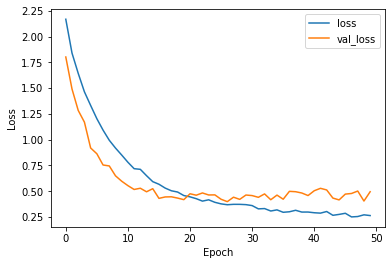

In [39]:
plt.plot(results.history["loss"], label="loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

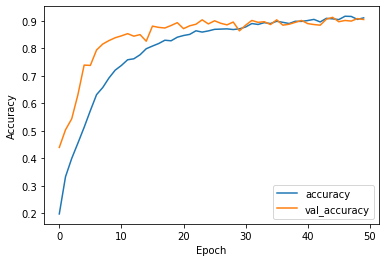

In [40]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [41]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 2s 35ms/step - loss: 0.4986 - accuracy: 0.9026


[0.4986431300640106, 0.9026346206665039]